In [6]:
## Data Manip libraries
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm

# built in function uses in graphics.py 
from graphics import *
import warnings
warnings.filterwarnings("ignore")
#DataViz libraries 
import seaborn as sns
import matplotlib.pyplot as plt

##graph libraries
import networkx as nx
from cdlib import ensemble
from cdlib import viz
from cdlib import evaluation
from cdlib import algorithms

## Table of Contents
<br>

 * [Task 0 : Data Exploration](#data_disc)

      * [Section 0.1 : Construncting graph componnents](#section_1)
 
<br>
 
* [Task 1 : Graph Building](#chapter2)
    * [Section 1.1 : Undirected and Unweighted network ](#section_11)
    * [Section 1.2 : Directed   and Unweighted network ](#section_12)
    * [Section 1.3:  Undirected and Weighted network ](#section_13)
    * [Section 1.4   Directed   and Weighted network ](#section_14)
    
<br>

* [Task 2 : Community Detection Algorithm](#task2)
    * [Section 2.1 :  Resolution=10](#res10)
    * [Section 2.2 :  Resolution=15](#res15)
    * [Section 2.3 :  Resolution=20](#res20)
    * [Section 2.4 :  Resolution=25](#res25)
    * [Section 2.5 :  Resolution=30](#res30)
   
<br>

* [Task 3 : Community Dependencies](#task3)
    * [Section 3.1 :  Used Metrics](#met)
    * [Section 3.2 :  Summary and stats](#sum)



## Task 0 : Data Exploration <a class="anchor" id="data_disc"></a>

In [9]:
comunity_path='./data/Communities.csv'
home_path='./data/Home_Work.csv'

In [10]:
person_data=pd.read_csv(home_path)
person_data

ID   HomeID   WorkID       X_home       Y_home       X_work  \
0            1   SBNC1A  MILANL0  341686.4129  6281809.470  346612.7447   
1            2  NTSUF8A  BRAVONA  345654.7848  6299613.133  344373.1429   
2            3   SRCC1A  ABELF5A  350460.2429  6301504.902  349553.4784   
3            4  HARRIAA  TOBALAA  356795.8867  6302740.317  351999.8339   
4            5  DPCRZAA  ECOR6AA  353566.2768  6290889.943  348236.0712   
...        ...      ...      ...          ...          ...          ...   
346633  346634  PMRC110  JDCEFEA  349780.8612  6300284.769  351336.2295   
346634  346635  CARMEAA   MTTC1A  347890.1977  6297504.555  347957.3385   
346635  346636  EPARF5A   CSTG1A  347249.8743  6288604.194  345343.1844   
346636  346637  ALLOF8A  MAPUCAA  335861.1521  6290238.796  336302.0539   
346637  346638  EASYQAA  RGRCF8A  353290.7298  6294613.540  353351.9980   

             Y_work  
0       6294617.876  
1       6299377.528  
2       6300536.641  
3       6299314.144  
4       6299072.763  
...             ...  
346633  6296754.104  
346634  6296311.073  
346635  6287604.456  
346636  6290570.855  
346637  6295389.786  

[346638 rows x 7 columns]

In [4]:
home_cell=np.unique(person_data.HomeID)
work_cell=np.unique(person_data.WorkID)
print(len(home_cell),len(work_cell))

1112 1142


In [5]:
cell_towers=np.unique((np.concatenate([home_cell,work_cell])))
print(len(cell_towers))

1144


# Section 0.1 : Construncting graph componnents <a class="anchor" id="section_1"></a>

In [6]:
graph_info=[]

In [7]:
for home_tower in home_cell:
    home_data=person_data.loc[person_data.HomeID ==home_tower]
    for work_tower in np.unique(home_data.WorkID):
        weight=len(home_data.loc[(home_data.WorkID ==work_tower)]) 
        graph_info.append((home_tower,work_tower,weight))

## Task 1 : Graph Building <a class="anchor" id="chapter2"></a>

# Section 1.1 : Undirected and unweighted network
 <a class="anchor" id="section_11"></a>

In [8]:
edgelist = [info[:-1] for info in graph_info]
undirected_graph = nx.Graph(edgelist)
get_graph_info(undirected_graph)

Edges number : 130120 Nodes number : 1144
Mean degree of the graph : 227
The mean Clustering Coefficient: 0.4812721348908879


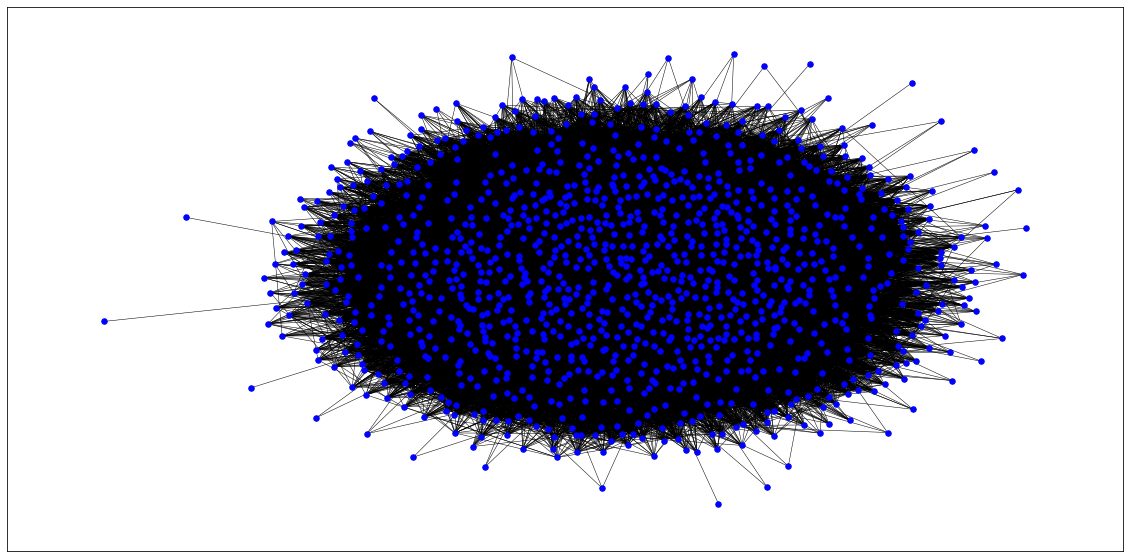

In [9]:
pos=nx.kamada_kawai_layout(undirected_graph)
node_options={"node_color":"blue","node_size":30}
edge_options={"width":.5,"alpha":1,"edge_color":"black"}
plt.figure(figsize=(20,10))
nx.draw_networkx_nodes(undirected_graph,pos,**node_options)
nx.draw_networkx_edges(undirected_graph,pos,**edge_options)
plt.show()

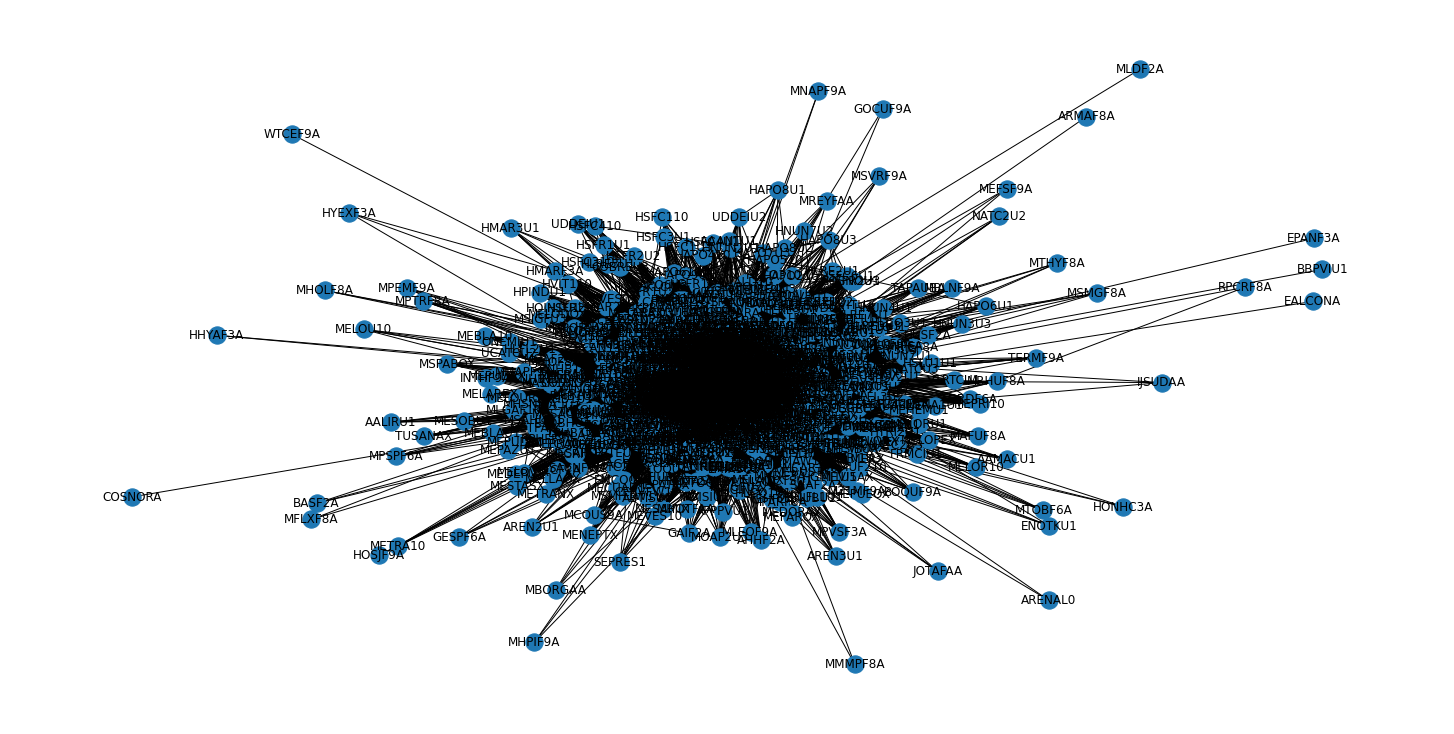

In [10]:
plt.figure(figsize=(20,10))
nx.draw(undirected_graph, with_labels = True)
plt.show()

# Section 1.2 : Directed and unweighted network
 <a class="anchor" id="section_12"></a>

In [9]:
directed_graph = nx.DiGraph()
directed_graph.add_edges_from(edgelist)
get_graph_info(directed_graph)

Edges number : 152781 Nodes number : 1144
Mean degree of the graph : 267
The mean Clustering Coefficient: 0.31920757622115803


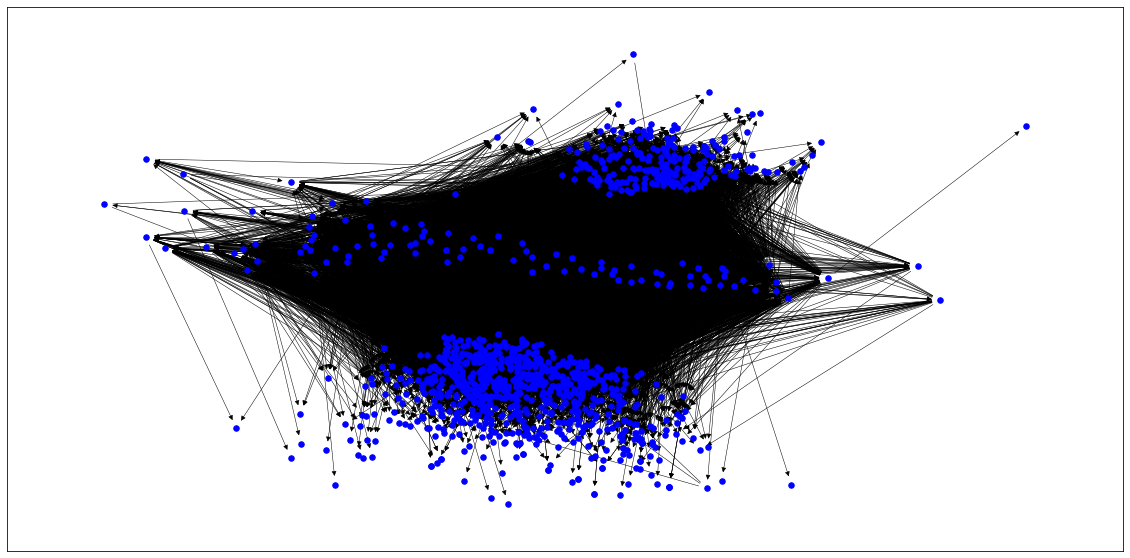

In [25]:
pos=nx.kamada_kawai_layout(directed_graph)
node_options={"node_color":"blue","node_size":30}
edge_options={"width":.5,"alpha":1,"edge_color":"black"}
plt.figure(figsize=(20,10))
nx.draw_networkx_nodes(directed_graph,pos,**node_options)
nx.draw_networkx_edges(directed_graph,pos,**edge_options)
plt.show()

# Section 1.3 : Undirected and weighted network
 <a class="anchor" id="section_13"></a>

In [64]:
weighted_graph = nx.Graph()
for info in graph_info:
    weighted_graph.add_edge(info[0],info[1], weight= info[2])
# display graph info
get_graph_info(weighted_graph)

Edges number : 130120 Nodes number : 1144
Mean degree of the graph : 227
The mean Clustering Coefficient: 0.4812721348908879


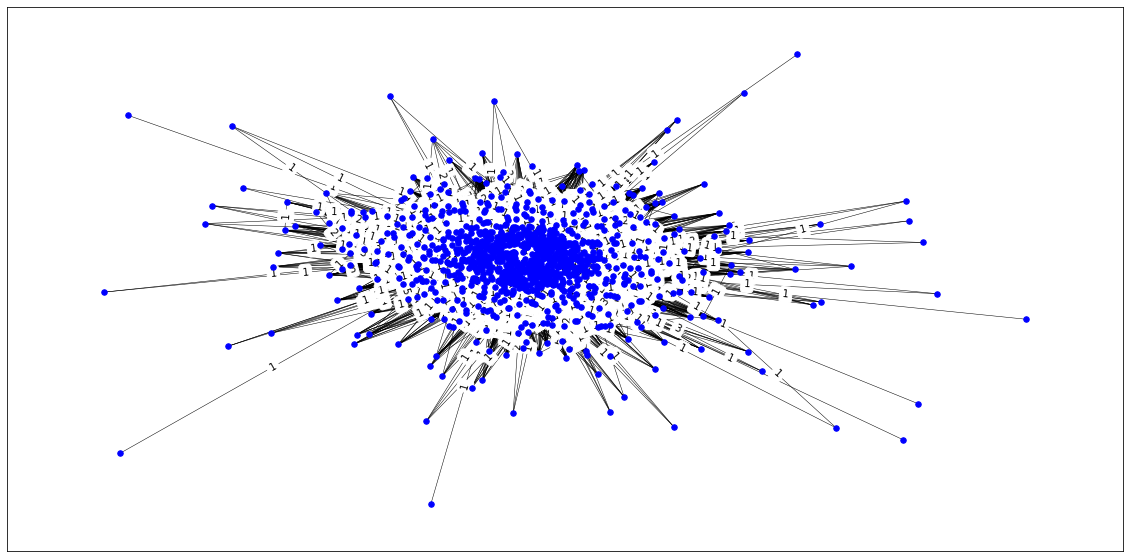

In [32]:
pos=nx.spring_layout(weighted_graph)
node_options={"node_color":"blue","node_size":30}
edge_options={"width":.5,"alpha":1,"edge_color":"black"}
plt.figure(figsize=(20,10))
nx.draw_networkx_nodes(weighted_graph,pos,**node_options)
nx.draw_networkx_edges(weighted_graph,pos,**edge_options)
edge_labels = nx.get_edge_attributes(weighted_graph, "weight")
nx.draw_networkx_edge_labels(weighted_graph, pos, edge_labels)
plt.show()

# Section 1.4 : Directed and Weighted network
 <a class="anchor" id="section_14"></a>

In [11]:
wdirected_graph = nx.DiGraph()
for info in graph_info:
    wdirected_graph.add_edge(info[0],info[1], weight= info[2])

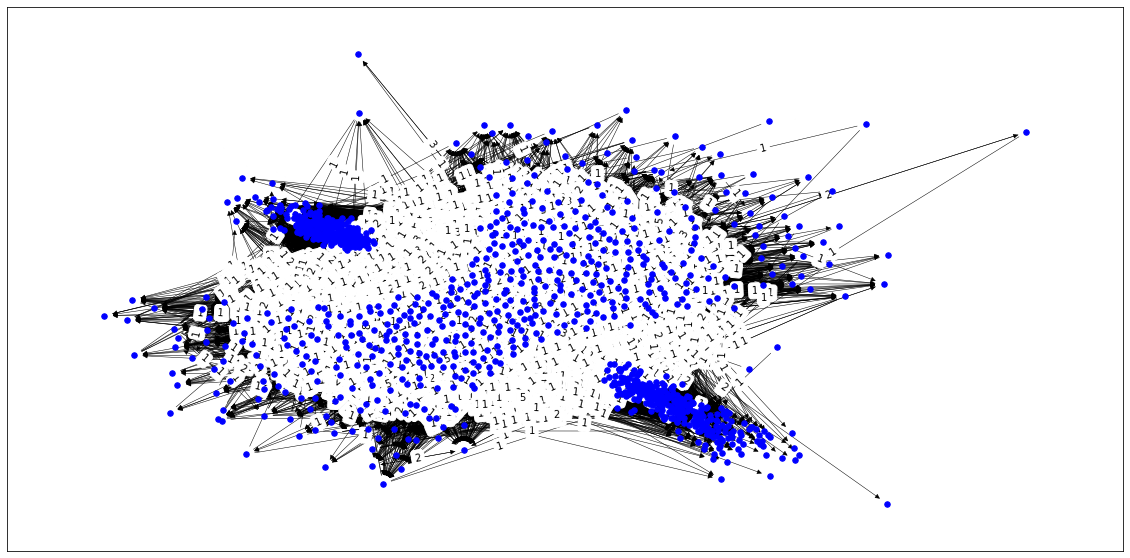

In [46]:
pos=nx.kamada_kawai_layout(wdirected_graph)
node_options={"node_color":"blue","node_size":30}
edge_options={"width":.5,"alpha":1,"edge_color":"black"}
plt.figure(figsize=(20,10))
nx.draw_networkx_nodes(wdirected_graph,pos,**node_options)
nx.draw_networkx_edges(wdirected_graph,pos,**edge_options)
edge_labels = nx.get_edge_attributes(wdirected_graph, "weight")
nx.draw_networkx_edge_labels(wdirected_graph, pos, edge_labels)
plt.show()

## Task 2 : Community Detection Algorithm
 <a class="anchor" id="task2"></a>

<AxesSubplot:xlabel='Community', ylabel='Count'>

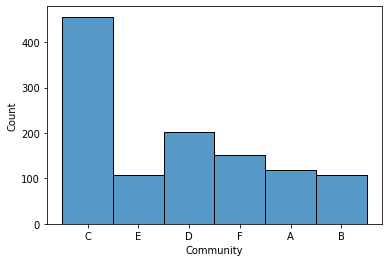

In [11]:
communities=pd.read_csv('./data/Communities.csv')
sns.histplot(communities.Community)

In [66]:
coms = algorithms.louvain(undirected_graph, weight='weight', resolution=5, randomize=False)

In [ ]:
# Louvain configuration
pos = nx.spring_layout(undirected_graph)
lp_coms = algorithms.label_propagation(undirected_graph)
wp_coms = algorithms.walktrap(undirected_graph)

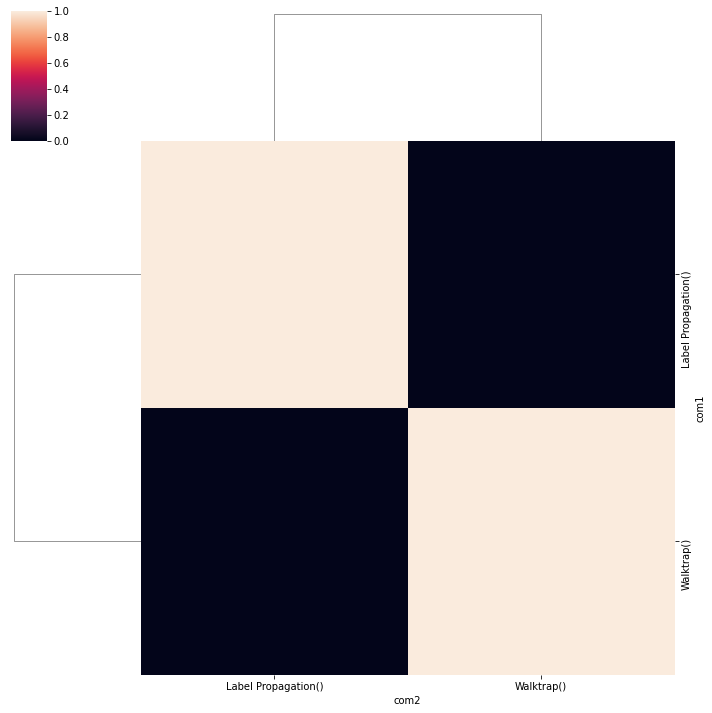

In [17]:
viz.plot_sim_matrix([ lp_coms, wp_coms],evaluation.adjusted_mutual_information)

In [67]:
def distances_from_centroid_class(array):
    c, indices = torch.median(array, dim=0)
    c = c.reshape((1, len(c)))
    distance= torch.cdist(array, c, p=1)
    distance = distance.reshape((len(distance),))
    return int(torch.mean(distance)),int(torch.std(distance))

# Section 2.1 : Resolution=10 <a class="anchor" id="res10"></a>

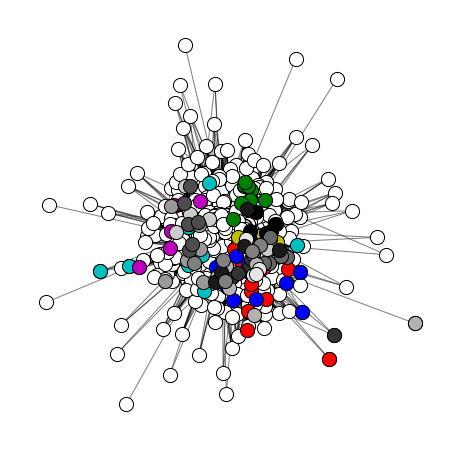

In [68]:
resolution=10
coms = algorithms.louvain(undirected_graph, weight='weight', resolution=resolution, 
                          randomize=False)
viz.plot_network_clusters(undirected_graph, coms, pos)

In [69]:
res_data=pd.DataFrame(columns=['Tower','Community'])
for community_cluster in coms.communities :
    cluster=len(community_cluster)
    for comu in community_cluster:
        res_data=res_data.append({'Tower': comu,'Community':cluster}, ignore_index=True)
res_data

Tower Community
0     ELALF8A        11
1     HAPO7U1        11
2     HSFC1U3        11
3     HAPO9U1        11
4      CALG1A        11
...       ...       ...
1139  MRNC110         1
1140  SACRF9A         1
1141  LBANF6A         1
1142  SACAML0         1
1143   WMAF2A         1

[1144 rows x 2 columns]

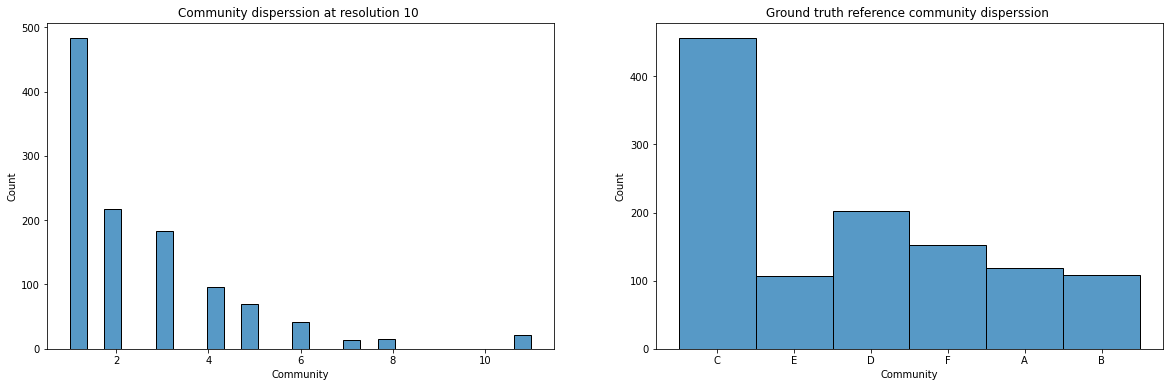

In [70]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
axs[0].set_title('Community disperssion at resolution {} '.format(resolution))
axs[1].set_title('Ground truth reference community disperssion ')
sns.histplot(data=res_data, x="Community", ax=axs[0])
sns.histplot(data=communities, x="Community",ax=axs[1])
plt.show()

In [71]:
towers=pd.DataFrame(np.vstack([person_data[['HomeID','X_home','Y_home']].values,
                    person_data[['WorkID','X_work','Y_work']].values]),
                    columns=['HomeID','X_home','Y_home'])
towers=towers.drop_duplicates()
merged_data=towers.merge(communities,how='inner',left_on='HomeID',right_on='Tower')
merged_data=merged_data.drop(columns=[' ','HomeID'],axis=1)
merged_data

X_home       Y_home    Tower Community
0     341686.4129   6281809.47   SBNC1A         E
1     345654.7848  6299613.133  NTSUF8A         A
2     350460.2429  6301504.902   SRCC1A         C
3     356795.8867  6302740.317  HARRIAA         C
4     353566.2768  6290889.943  DPCRZAA         F
...           ...          ...      ...       ...
1139  350390.3488  6299195.271  IJSUDAA         C
1140  351787.7215  6301243.181  MEFSF9A         F
1141  356146.1541  6304427.727  EALCONA         D
1142  345723.8749  6299767.667  COSNORA         A
1143   350183.069  6300496.197  BBPVIU1         C

[1144 rows x 4 columns]

In [72]:
res_merged_data=towers.merge(res_data,how='inner',left_on='HomeID',right_on='Tower')
res_merged_data=res_merged_data.drop(columns=['HomeID'],axis=1)
res_merged_data['Community']=res_merged_data['Community'].astype('str')
res_merged_data

X_home       Y_home    Tower Community
0     341686.4129   6281809.47   SBNC1A         4
1     345654.7848  6299613.133  NTSUF8A         1
2     350460.2429  6301504.902   SRCC1A         2
3     356795.8867  6302740.317  HARRIAA         1
4     353566.2768  6290889.943  DPCRZAA         1
...           ...          ...      ...       ...
1139  350390.3488  6299195.271  IJSUDAA         2
1140  351787.7215  6301243.181  MEFSF9A         4
1141  356146.1541  6304427.727  EALCONA         2
1142  345723.8749  6299767.667  COSNORA         2
1143   350183.069  6300496.197  BBPVIU1         2

[1144 rows x 4 columns]

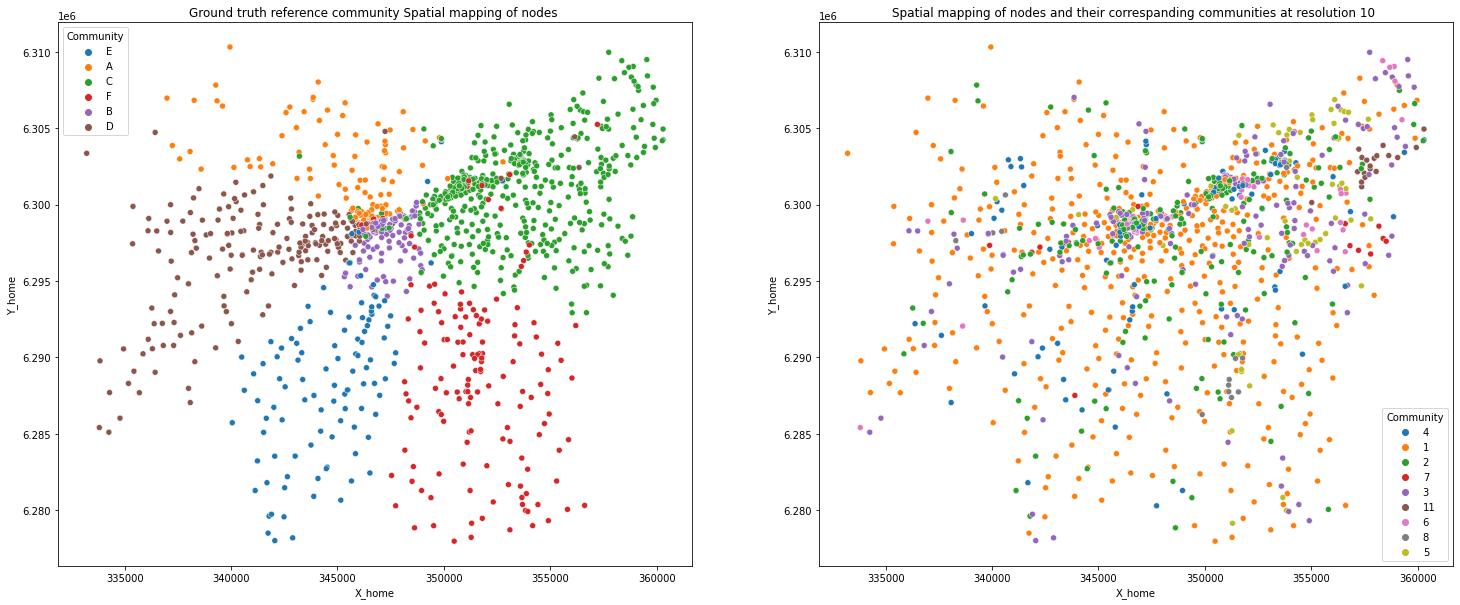

In [73]:
fig, axs = plt.subplots(ncols=2, figsize=(25,10))
axs[1].set_title(
    'Spatial mapping of nodes and their correspanding communities at resolution {} '.format(resolution)
            )
axs[0].set_title('Ground truth reference community Spatial mapping of nodes ')
sns.scatterplot(data=merged_data, x="X_home", y="Y_home",hue="Community",ax=axs[0])
sns.scatterplot(data=res_merged_data, x="X_home", y="Y_home",hue="Community",ax=axs[1])
plt.show()

In [74]:
for classe in np.unique(communities.Community):
    targeted_class=communities[communities.Community==classe]
    print('on classe {} :'.format(classe))
    print('class count {}'.format (len(targeted_class)))


on classe A :
class count 119
on classe B :
class count 108
on classe C :
class count 456
on classe D :
class count 202
on classe E :
class count 107
on classe F :
class count 152


In [75]:
statistics=pd.DataFrame(columns=['class','mean','standard_deviation'])
for classe in np.unique(merged_data.Community):
    x=torch.from_numpy(
                merged_data[merged_data['Community']==classe][['X_home','Y_home']].values.astype('float64')
                )
    stats=distances_from_centroid_class(x)
    statistics=statistics.append({'class': classe,
                                  'mean':stats[0],'standard_deviation':stats[1]}, ignore_index=True)
for classe in np.unique(res_merged_data.Community):
    x=torch.from_numpy(
                res_merged_data[res_merged_data['Community']==classe][['X_home','Y_home']].values.astype('float64')
                )
    stats=distances_from_centroid_class(x)
    statistics=statistics.append({'class': classe,
                                  'mean':stats[0],'standard_deviation':stats[1]}, ignore_index=True)

In [76]:
statistics

class  mean standard_deviation
0      A  4321               2999
1      B  1806               1336
2      C  5040               2978
3      D  5591               4230
4      E  5990               3854
5      F  6774               4269
6      1  9460               5943
7     11  2147               2002
8      2  7230               5501
9      3  8531               6215
10     4  8528               5283
11     5  7036               4221
12     6  7688               6168
13     7  8528               3841
14     8  9526               7101

In [98]:
gt_community_metric=round(sum(statistics.standard_deviation[:6])/6,2 )
res_community_metric=round(sum(statistics.standard_deviation[6:])/(len(statistics)-6),2)
print(gt_community_metric,res_community_metric)

3277.67 5141.67


<AxesSubplot:xlabel='class', ylabel='mean'>

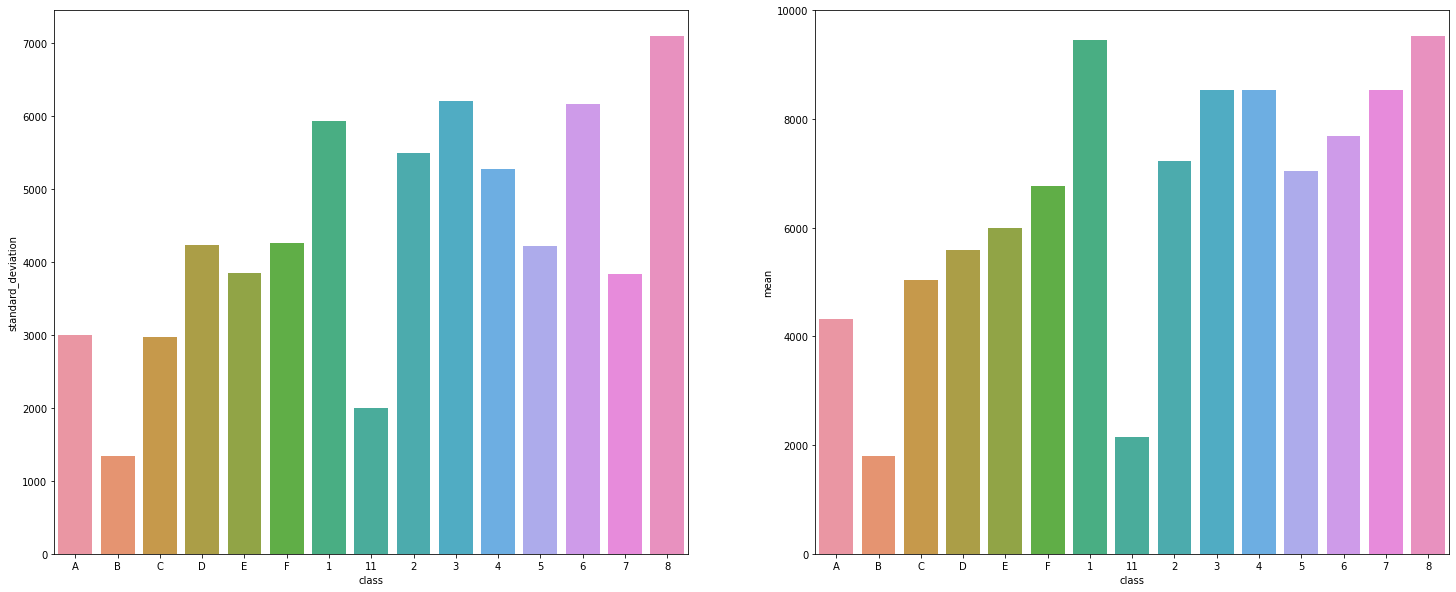

In [99]:
fig, axs = plt.subplots(ncols=2, figsize=(25,10))
sns.barplot(x = 'class', y = 'standard_deviation', data = statistics,ax=axs[0])
sns.barplot(x = 'class', y = 'mean', data = statistics,ax=axs[1])

# Section 2.2 : Resolution=15 <a class="anchor" id="res15"></a>

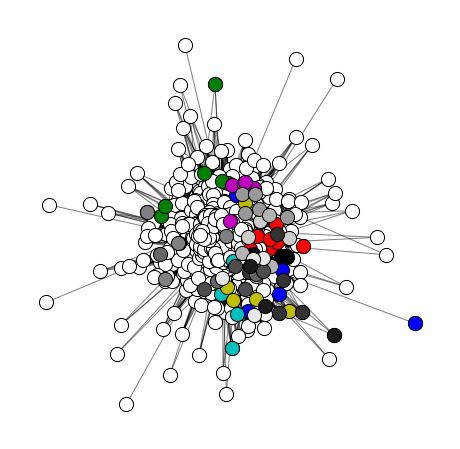

In [136]:
resolution=15
coms = algorithms.louvain(undirected_graph, weight='weight', resolution=resolution, 
                          randomize=False)
viz.plot_network_clusters(undirected_graph, coms, pos)

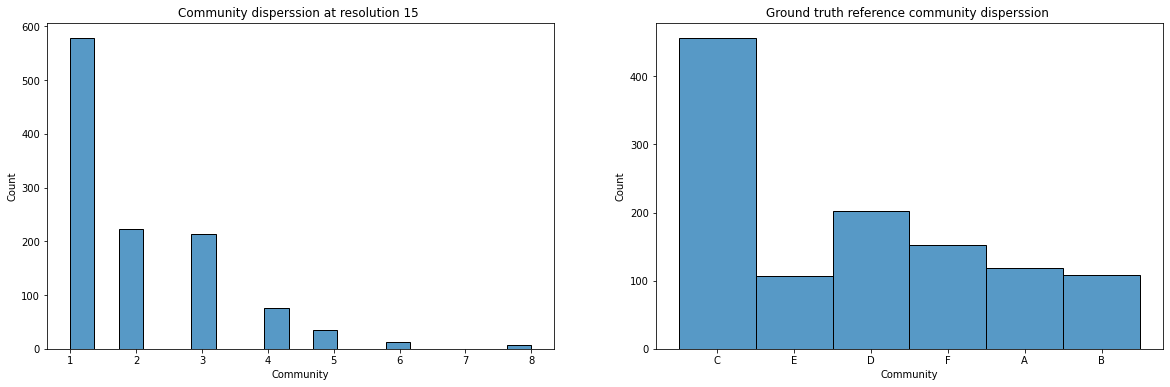

In [137]:
res_data=pd.DataFrame(columns=['Tower','Community'])
for community_cluster in coms.communities :
    cluster=len(community_cluster)
    for comu in community_cluster:
        res_data=res_data.append({'Tower': comu,'Community':cluster}, ignore_index=True)
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
axs[0].set_title('Community disperssion at resolution {} '.format(resolution))
axs[1].set_title('Ground truth reference community disperssion ')
sns.histplot(data=res_data, x="Community", ax=axs[0])
sns.histplot(data=communities, x="Community",ax=axs[1])
plt.show()

In [138]:
towers=pd.DataFrame(np.vstack([person_data[['HomeID','X_home','Y_home']].values,
                    person_data[['WorkID','X_work','Y_work']].values]),
                    columns=['HomeID','X_home','Y_home'])
towers=towers.drop_duplicates()
merged_data=towers.merge(communities,how='inner',left_on='HomeID',right_on='Tower')
merged_data=merged_data.drop(columns=[' ','HomeID'],axis=1)
merged_data

X_home       Y_home    Tower Community
0     341686.4129   6281809.47   SBNC1A         E
1     345654.7848  6299613.133  NTSUF8A         A
2     350460.2429  6301504.902   SRCC1A         C
3     356795.8867  6302740.317  HARRIAA         C
4     353566.2768  6290889.943  DPCRZAA         F
...           ...          ...      ...       ...
1139  350390.3488  6299195.271  IJSUDAA         C
1140  351787.7215  6301243.181  MEFSF9A         F
1141  356146.1541  6304427.727  EALCONA         D
1142  345723.8749  6299767.667  COSNORA         A
1143   350183.069  6300496.197  BBPVIU1         C

[1144 rows x 4 columns]

In [139]:
res_merged_data=towers.merge(res_data,how='inner',left_on='HomeID',right_on='Tower')
res_merged_data=res_merged_data.drop(columns=['HomeID'],axis=1)
res_merged_data['Community']=res_merged_data['Community'].astype('str')
res_merged_data

X_home       Y_home    Tower Community
0     341686.4129   6281809.47   SBNC1A         1
1     345654.7848  6299613.133  NTSUF8A         1
2     350460.2429  6301504.902   SRCC1A         2
3     356795.8867  6302740.317  HARRIAA         1
4     353566.2768  6290889.943  DPCRZAA         1
...           ...          ...      ...       ...
1139  350390.3488  6299195.271  IJSUDAA         2
1140  351787.7215  6301243.181  MEFSF9A         3
1141  356146.1541  6304427.727  EALCONA         2
1142  345723.8749  6299767.667  COSNORA         2
1143   350183.069  6300496.197  BBPVIU1         2

[1144 rows x 4 columns]

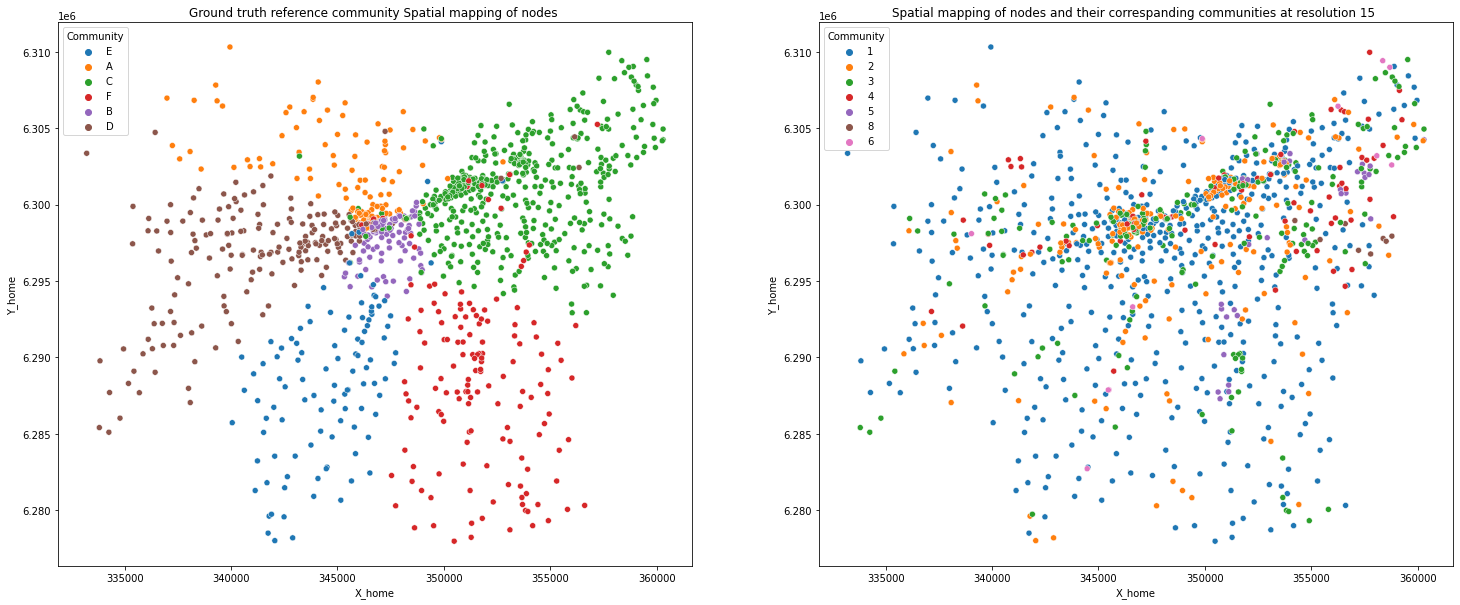

In [140]:
fig, axs = plt.subplots(ncols=2, figsize=(25,10))
axs[1].set_title(
    'Spatial mapping of nodes and their correspanding communities at resolution {} '.format(resolution)
            )
axs[0].set_title('Ground truth reference community Spatial mapping of nodes ')
sns.scatterplot(data=merged_data, x="X_home", y="Y_home",hue="Community",ax=axs[0])
sns.scatterplot(data=res_merged_data, x="X_home", y="Y_home",hue="Community",ax=axs[1])
plt.show()

In [141]:
statistics=pd.DataFrame(columns=['class','mean','standard_deviation'])
for classe in np.unique(merged_data.Community):
    x=torch.from_numpy(
                merged_data[merged_data['Community']==classe][['X_home','Y_home']].values.astype('float64')
                )
    stats=distances_from_centroid_class(x)
    statistics=statistics.append({'class': classe,
                                  'mean':stats[0],'standard_deviation':stats[1]}, ignore_index=True)
for classe in np.unique(res_merged_data.Community):
    x=torch.from_numpy(
                res_merged_data[res_merged_data['Community']==classe][['X_home','Y_home']].values.astype('float64')
                )
    stats=distances_from_centroid_class(x)
    statistics=statistics.append({'class': classe,
                                  'mean':stats[0],'standard_deviation':stats[1]}, ignore_index=True)

In [142]:
statistics

class   mean standard_deviation
0      A   4321               2999
1      B   1806               1336
2      C   5040               2978
3      D   5591               4230
4      E   5990               3854
5      F   6774               4269
6      1   9489               5984
7      2   7346               5473
8      3   8461               5887
9      4   8017               4433
10     5   6731               4121
11     6  13188               6581
12     8   1792               1050

In [143]:
gt_community_metric=round(sum(statistics.standard_deviation[:6])/6,2 )
res_community_metric=round(sum(statistics.standard_deviation[6:])/(len(statistics)-6),2)
print(gt_community_metric,res_community_metric)

3277.67 4789.86


<AxesSubplot:xlabel='class', ylabel='mean'>

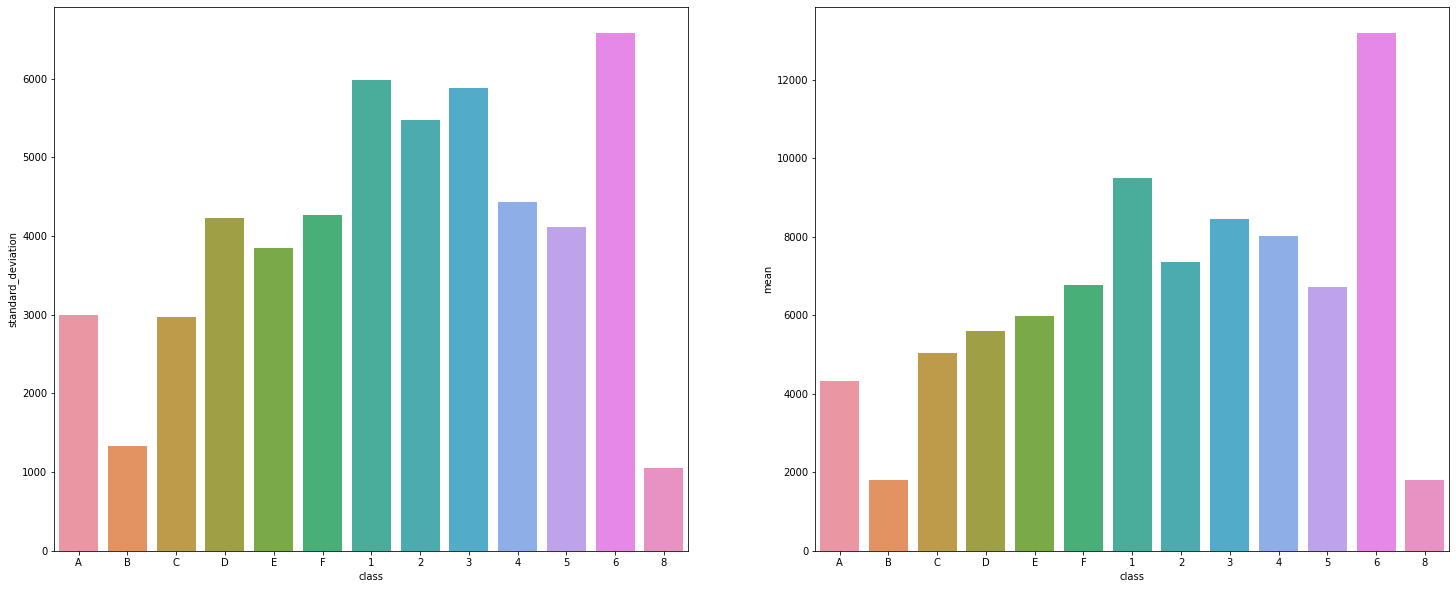

In [108]:
fig, axs = plt.subplots(ncols=2, figsize=(25,10))
sns.barplot(x = 'class', y = 'standard_deviation', data = statistics,ax=axs[0])
sns.barplot(x = 'class', y = 'mean', data = statistics,ax=axs[1])

# Section 2.3 : Resolution=20 <a class="anchor" id="res20"></a>

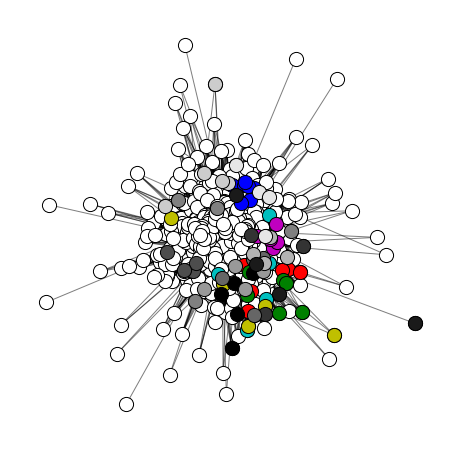

In [109]:
resolution=20
coms = algorithms.louvain(undirected_graph, weight='weight', resolution=resolution, 
                          randomize=False)
viz.plot_network_clusters(undirected_graph, coms, pos)

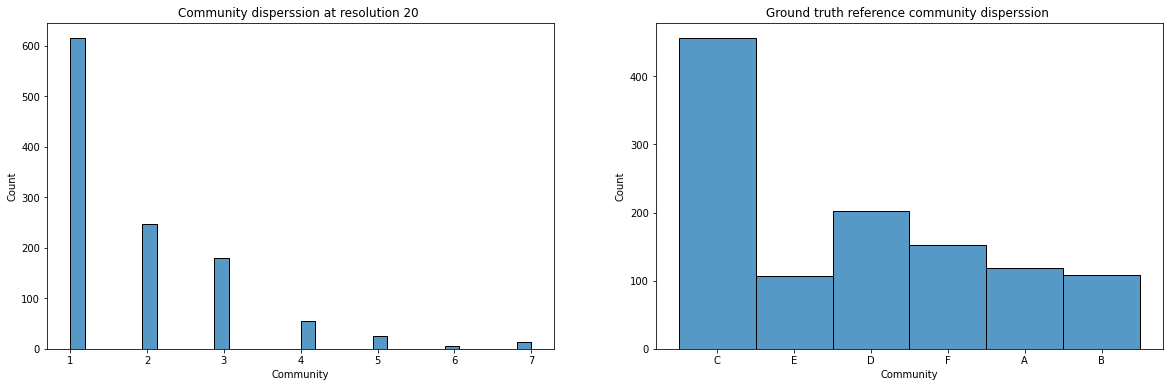

In [110]:
res_data=pd.DataFrame(columns=['Tower','Community'])
for community_cluster in coms.communities :
    cluster=len(community_cluster)
    for comu in community_cluster:
        res_data=res_data.append({'Tower': comu,'Community':cluster}, ignore_index=True)
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
axs[0].set_title('Community disperssion at resolution {} '.format(resolution))
axs[1].set_title('Ground truth reference community disperssion ')
sns.histplot(data=res_data, x="Community", ax=axs[0])
sns.histplot(data=communities, x="Community",ax=axs[1])
plt.show()

In [111]:
towers=pd.DataFrame(np.vstack([person_data[['HomeID','X_home','Y_home']].values,
                    person_data[['WorkID','X_work','Y_work']].values]),
                    columns=['HomeID','X_home','Y_home'])
towers=towers.drop_duplicates()
merged_data=towers.merge(communities,how='inner',left_on='HomeID',right_on='Tower')
merged_data=merged_data.drop(columns=[' ','HomeID'],axis=1)
merged_data

X_home       Y_home    Tower Community
0     341686.4129   6281809.47   SBNC1A         E
1     345654.7848  6299613.133  NTSUF8A         A
2     350460.2429  6301504.902   SRCC1A         C
3     356795.8867  6302740.317  HARRIAA         C
4     353566.2768  6290889.943  DPCRZAA         F
...           ...          ...      ...       ...
1139  350390.3488  6299195.271  IJSUDAA         C
1140  351787.7215  6301243.181  MEFSF9A         F
1141  356146.1541  6304427.727  EALCONA         D
1142  345723.8749  6299767.667  COSNORA         A
1143   350183.069  6300496.197  BBPVIU1         C

[1144 rows x 4 columns]

In [112]:
res_merged_data=towers.merge(res_data,how='inner',left_on='HomeID',right_on='Tower')
res_merged_data=res_merged_data.drop(columns=['HomeID'],axis=1)
res_merged_data['Community']=res_merged_data['Community'].astype('str')
res_merged_data

X_home       Y_home    Tower Community
0     341686.4129   6281809.47   SBNC1A         1
1     345654.7848  6299613.133  NTSUF8A         1
2     350460.2429  6301504.902   SRCC1A         2
3     356795.8867  6302740.317  HARRIAA         1
4     353566.2768  6290889.943  DPCRZAA         1
...           ...          ...      ...       ...
1139  350390.3488  6299195.271  IJSUDAA         2
1140  351787.7215  6301243.181  MEFSF9A         3
1141  356146.1541  6304427.727  EALCONA         2
1142  345723.8749  6299767.667  COSNORA         2
1143   350183.069  6300496.197  BBPVIU1         2

[1144 rows x 4 columns]

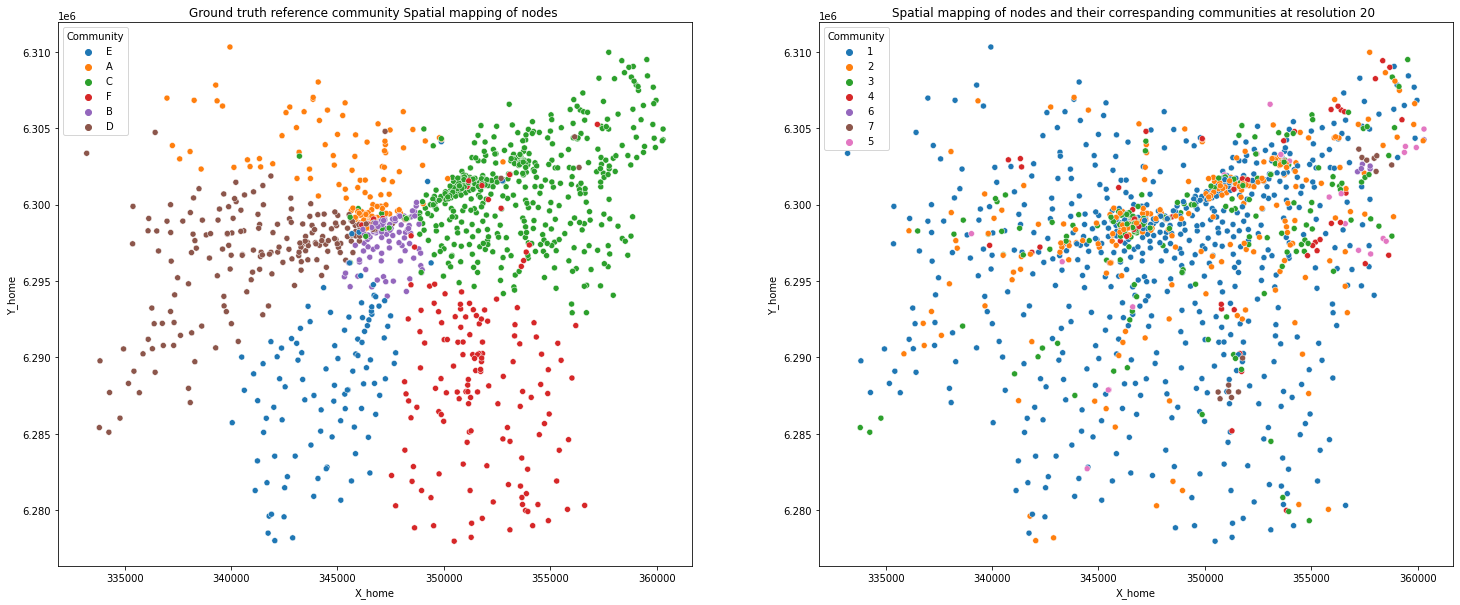

In [113]:
fig, axs = plt.subplots(ncols=2, figsize=(25,10))
axs[1].set_title(
    'Spatial mapping of nodes and their correspanding communities at resolution {} '.format(resolution)
            )
axs[0].set_title('Ground truth reference community Spatial mapping of nodes ')
sns.scatterplot(data=merged_data, x="X_home", y="Y_home",hue="Community",ax=axs[0])
sns.scatterplot(data=res_merged_data, x="X_home", y="Y_home",hue="Community",ax=axs[1])
plt.show()

In [114]:
statistics=pd.DataFrame(columns=['class','mean','standard_deviation'])
for classe in np.unique(merged_data.Community):
    x=torch.from_numpy(
                merged_data[merged_data['Community']==classe][['X_home','Y_home']].values.astype('float64')
                )
    stats=distances_from_centroid_class(x)
    statistics=statistics.append({'class': classe,
                                  'mean':stats[0],'standard_deviation':stats[1]}, ignore_index=True)
for classe in np.unique(res_merged_data.Community):
    x=torch.from_numpy(
                res_merged_data[res_merged_data['Community']==classe][['X_home','Y_home']].values.astype('float64')
                )
    stats=distances_from_centroid_class(x)
    statistics=statistics.append({'class': classe,
                                  'mean':stats[0],'standard_deviation':stats[1]}, ignore_index=True)

In [115]:
statistics

class   mean standard_deviation
0      A   4321               2999
1      B   1806               1336
2      C   5040               2978
3      D   5591               4230
4      E   5990               3854
5      F   6774               4269
6      1   9436               6021
7      2   7794               5531
8      3   7568               5505
9      4   8371               4320
10     5   9018               6592
11     6   1077               1823
12     7  10814               8618

In [116]:
gt_community_metric=round(sum(statistics.standard_deviation[:6])/6,2 )
res_community_metric=round(sum(statistics.standard_deviation[6:])/(len(statistics)-6),2)
print(gt_community_metric,res_community_metric)

3277.67 5487.14


<AxesSubplot:xlabel='class', ylabel='mean'>

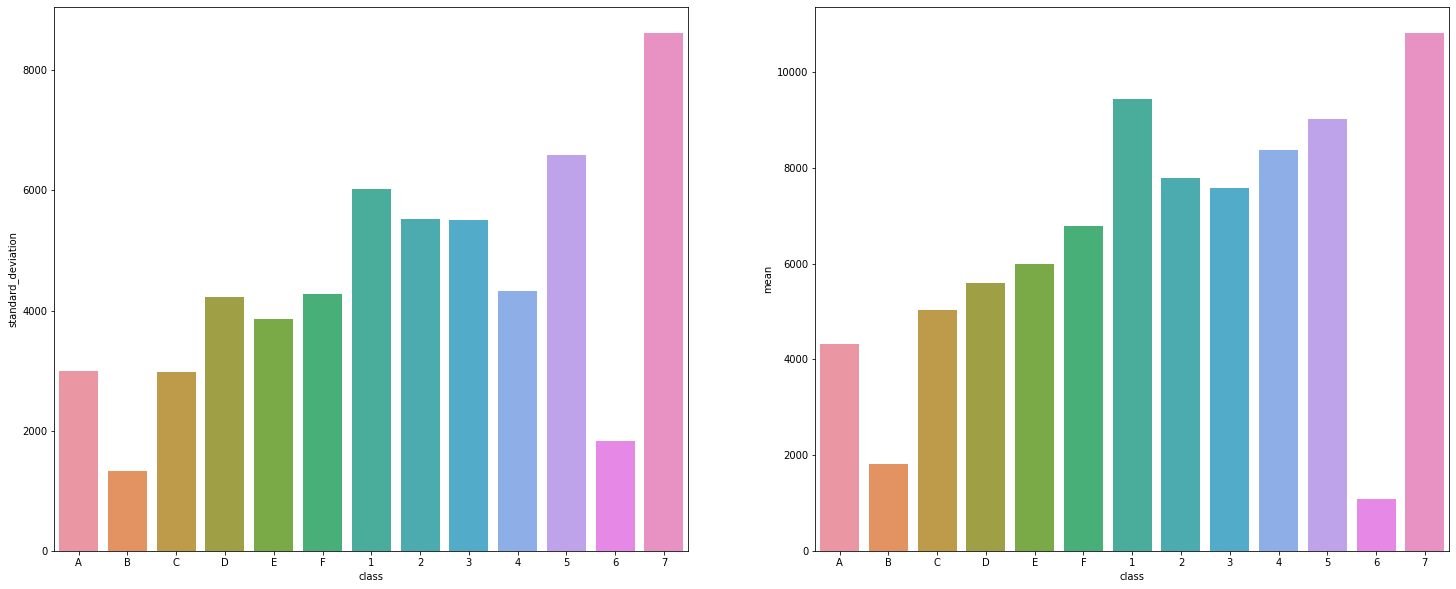

In [117]:
fig, axs = plt.subplots(ncols=2, figsize=(25,10))
sns.barplot(x = 'class', y = 'standard_deviation', data = statistics,ax=axs[0])
sns.barplot(x = 'class', y = 'mean', data = statistics,ax=axs[1])

# Section 2.4 : Resolution=25 <a class="anchor" id="res25"></a>

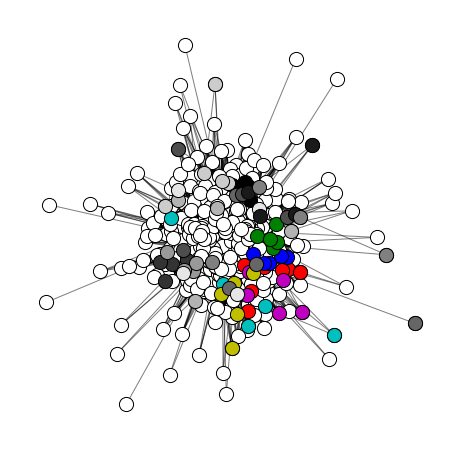

In [118]:
resolution=25
coms = algorithms.louvain(undirected_graph, weight='weight', resolution=resolution, 
                          randomize=False)
viz.plot_network_clusters(undirected_graph, coms, pos)

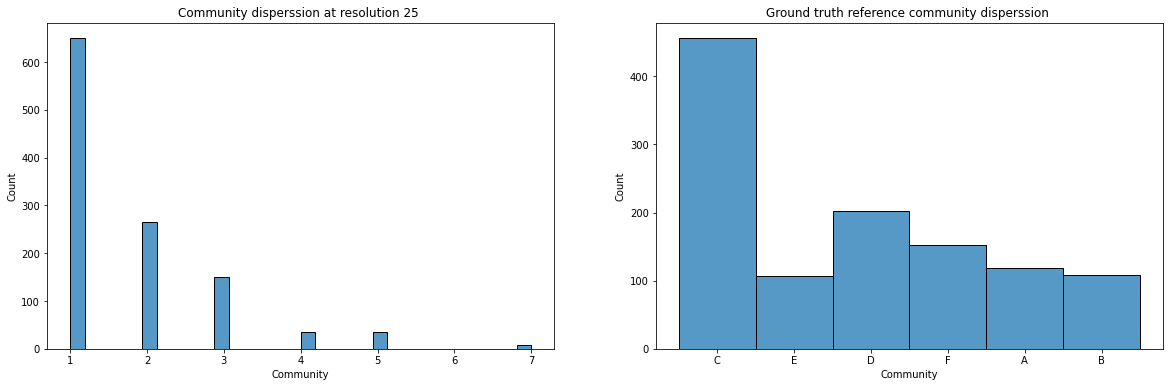

In [119]:
res_data=pd.DataFrame(columns=['Tower','Community'])
for community_cluster in coms.communities :
    cluster=len(community_cluster)
    for comu in community_cluster:
        res_data=res_data.append({'Tower': comu,'Community':cluster}, ignore_index=True)
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
axs[0].set_title('Community disperssion at resolution {} '.format(resolution))
axs[1].set_title('Ground truth reference community disperssion ')
sns.histplot(data=res_data, x="Community", ax=axs[0])
sns.histplot(data=communities, x="Community",ax=axs[1])
plt.show()

In [120]:
towers=pd.DataFrame(np.vstack([person_data[['HomeID','X_home','Y_home']].values,
                    person_data[['WorkID','X_work','Y_work']].values]),
                    columns=['HomeID','X_home','Y_home'])
towers=towers.drop_duplicates()
merged_data=towers.merge(communities,how='inner',left_on='HomeID',right_on='Tower')
merged_data=merged_data.drop(columns=[' ','HomeID'],axis=1)
merged_data

X_home       Y_home    Tower Community
0     341686.4129   6281809.47   SBNC1A         E
1     345654.7848  6299613.133  NTSUF8A         A
2     350460.2429  6301504.902   SRCC1A         C
3     356795.8867  6302740.317  HARRIAA         C
4     353566.2768  6290889.943  DPCRZAA         F
...           ...          ...      ...       ...
1139  350390.3488  6299195.271  IJSUDAA         C
1140  351787.7215  6301243.181  MEFSF9A         F
1141  356146.1541  6304427.727  EALCONA         D
1142  345723.8749  6299767.667  COSNORA         A
1143   350183.069  6300496.197  BBPVIU1         C

[1144 rows x 4 columns]

In [121]:
res_merged_data=towers.merge(res_data,how='inner',left_on='HomeID',right_on='Tower')
res_merged_data=res_merged_data.drop(columns=['HomeID'],axis=1)
res_merged_data['Community']=res_merged_data['Community'].astype('str')
res_merged_data

X_home       Y_home    Tower Community
0     341686.4129   6281809.47   SBNC1A         1
1     345654.7848  6299613.133  NTSUF8A         1
2     350460.2429  6301504.902   SRCC1A         2
3     356795.8867  6302740.317  HARRIAA         1
4     353566.2768  6290889.943  DPCRZAA         1
...           ...          ...      ...       ...
1139  350390.3488  6299195.271  IJSUDAA         2
1140  351787.7215  6301243.181  MEFSF9A         3
1141  356146.1541  6304427.727  EALCONA         2
1142  345723.8749  6299767.667  COSNORA         2
1143   350183.069  6300496.197  BBPVIU1         2

[1144 rows x 4 columns]

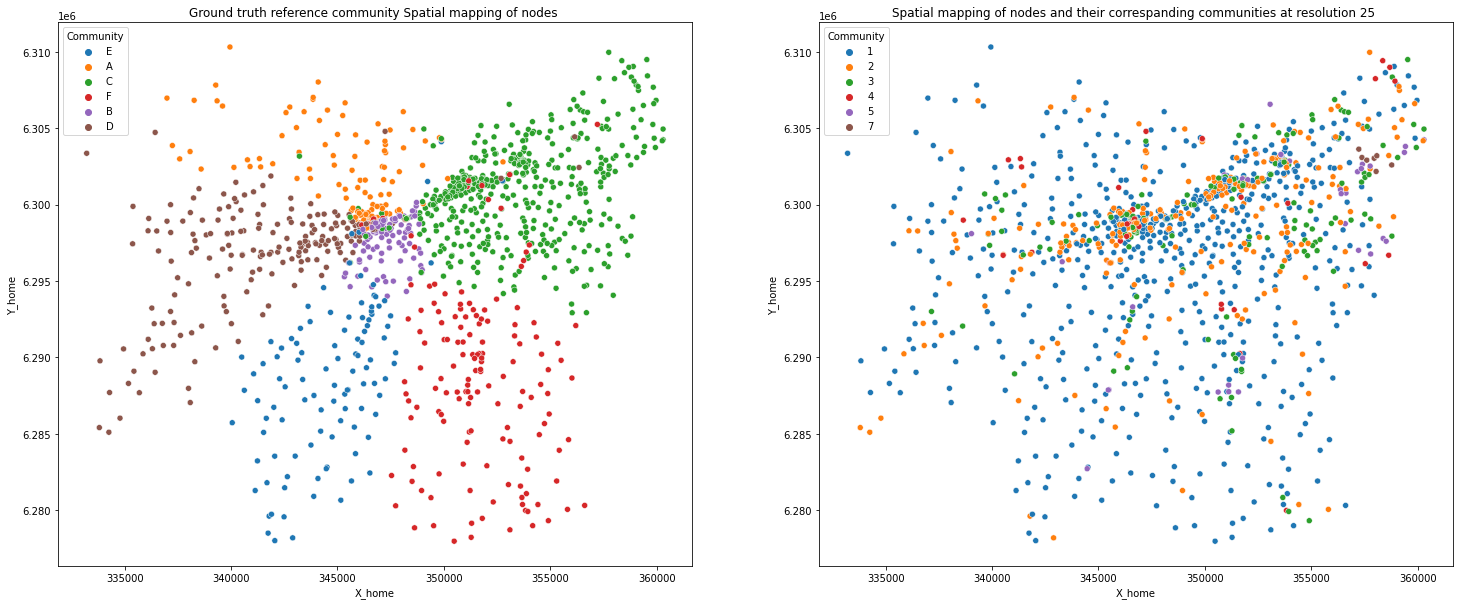

In [122]:
fig, axs = plt.subplots(ncols=2, figsize=(25,10))
axs[1].set_title(
    'Spatial mapping of nodes and their correspanding communities at resolution {} '.format(resolution)
            )
axs[0].set_title('Ground truth reference community Spatial mapping of nodes ')
sns.scatterplot(data=merged_data, x="X_home", y="Y_home",hue="Community",ax=axs[0])
sns.scatterplot(data=res_merged_data, x="X_home", y="Y_home",hue="Community",ax=axs[1])
plt.show()

In [123]:
statistics=pd.DataFrame(columns=['class','mean','standard_deviation'])
for classe in np.unique(merged_data.Community):
    x=torch.from_numpy(
                merged_data[merged_data['Community']==classe][['X_home','Y_home']].values.astype('float64')
                )
    stats=distances_from_centroid_class(x)
    statistics=statistics.append({'class': classe,
                                  'mean':stats[0],'standard_deviation':stats[1]}, ignore_index=True)
for classe in np.unique(res_merged_data.Community):
    x=torch.from_numpy(
                res_merged_data[res_merged_data['Community']==classe][['X_home','Y_home']].values.astype('float64')
                )
    stats=distances_from_centroid_class(x)
    statistics=statistics.append({'class': classe,
                                  'mean':stats[0],'standard_deviation':stats[1]}, ignore_index=True)

<AxesSubplot:xlabel='class', ylabel='mean'>

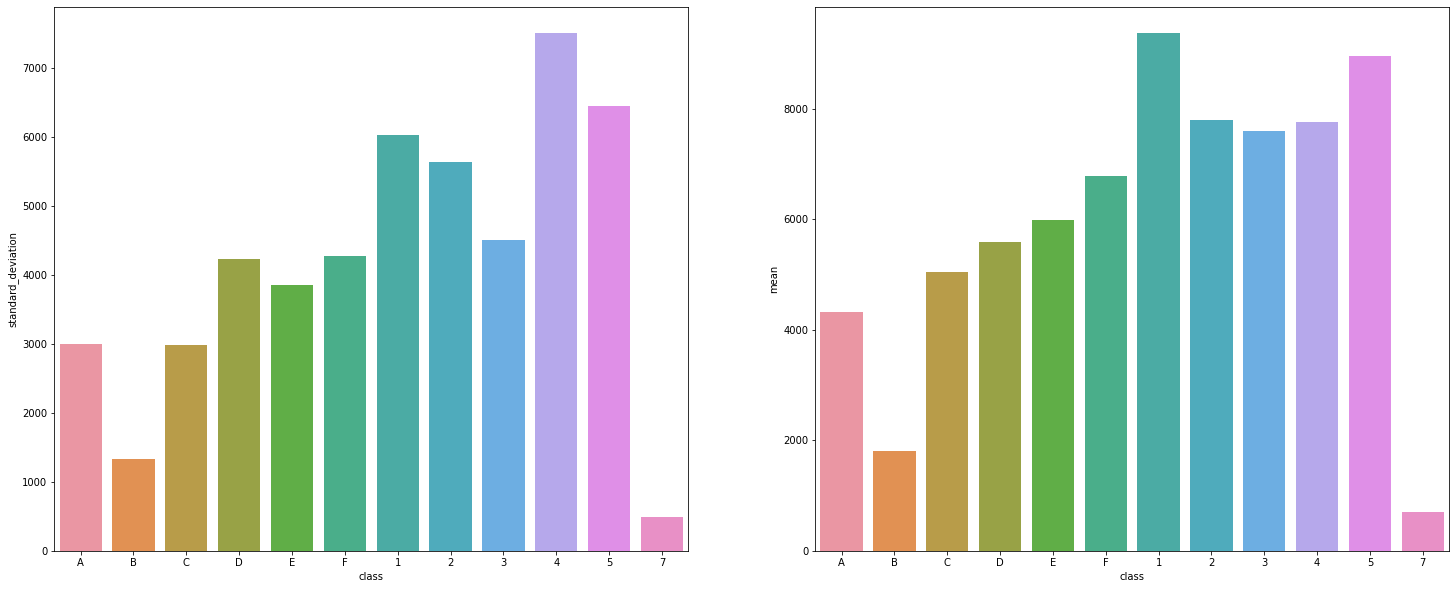

In [124]:
fig, axs = plt.subplots(ncols=2, figsize=(25,10))
sns.barplot(x = 'class', y = 'standard_deviation', data = statistics,ax=axs[0])
sns.barplot(x = 'class', y = 'mean', data = statistics,ax=axs[1])

In [125]:
statistics

class  mean standard_deviation
0      A  4321               2999
1      B  1806               1336
2      C  5040               2978
3      D  5591               4230
4      E  5990               3854
5      F  6774               4269
6      1  9369               6032
7      2  7800               5641
8      3  7591               4501
9      4  7760               7504
10     5  8959               6450
11     7   703                496

In [126]:
gt_community_metric=round(sum(statistics.standard_deviation[:6])/6,2 )
res_community_metric=round(sum(statistics.standard_deviation[6:])/(len(statistics)-6),2)
print(gt_community_metric,res_community_metric)

3277.67 5104.0


# Section 2.5 : Resolution=30 <a class="anchor" id="res30"></a>

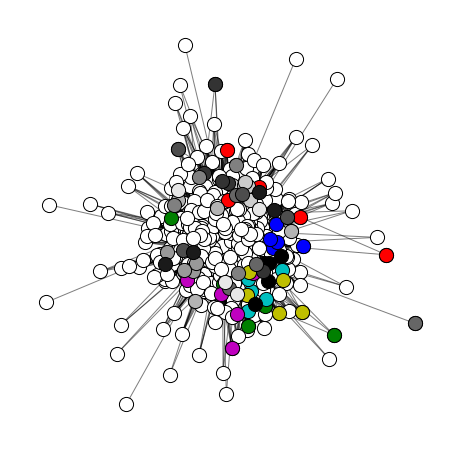

In [127]:
resolution=30
coms = algorithms.louvain(undirected_graph, weight='weight', resolution=resolution, 
                          randomize=False)
viz.plot_network_clusters(undirected_graph, coms, pos)

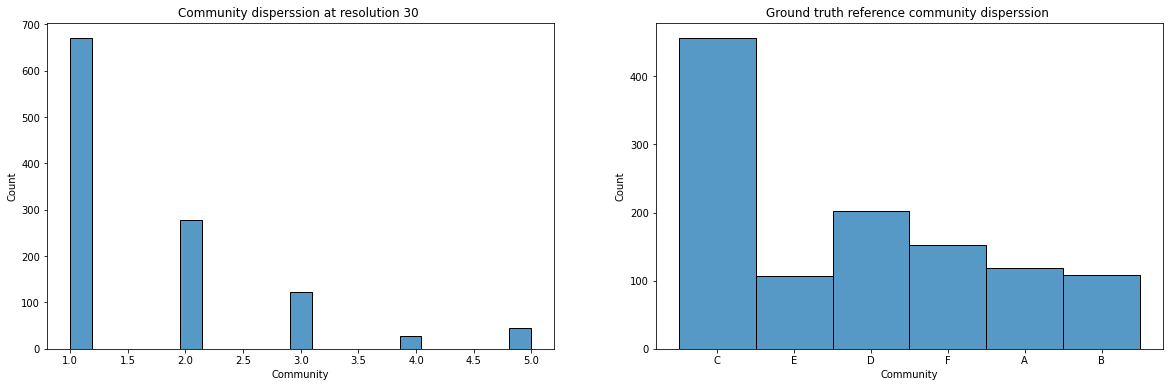

In [128]:
res_data=pd.DataFrame(columns=['Tower','Community'])
for community_cluster in coms.communities :
    cluster=len(community_cluster)
    for comu in community_cluster:
        res_data=res_data.append({'Tower': comu,'Community':cluster}, ignore_index=True)
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
axs[0].set_title('Community disperssion at resolution {} '.format(resolution))
axs[1].set_title('Ground truth reference community disperssion ')
sns.histplot(data=res_data, x="Community", ax=axs[0])
sns.histplot(data=communities, x="Community",ax=axs[1])
plt.show()

In [129]:
towers=pd.DataFrame(np.vstack([person_data[['HomeID','X_home','Y_home']].values,
                    person_data[['WorkID','X_work','Y_work']].values]),
                    columns=['HomeID','X_home','Y_home'])
towers=towers.drop_duplicates()
merged_data=towers.merge(communities,how='inner',left_on='HomeID',right_on='Tower')
merged_data=merged_data.drop(columns=[' ','HomeID'],axis=1)
merged_data

X_home       Y_home    Tower Community
0     341686.4129   6281809.47   SBNC1A         E
1     345654.7848  6299613.133  NTSUF8A         A
2     350460.2429  6301504.902   SRCC1A         C
3     356795.8867  6302740.317  HARRIAA         C
4     353566.2768  6290889.943  DPCRZAA         F
...           ...          ...      ...       ...
1139  350390.3488  6299195.271  IJSUDAA         C
1140  351787.7215  6301243.181  MEFSF9A         F
1141  356146.1541  6304427.727  EALCONA         D
1142  345723.8749  6299767.667  COSNORA         A
1143   350183.069  6300496.197  BBPVIU1         C

[1144 rows x 4 columns]

In [130]:
res_merged_data=towers.merge(res_data,how='inner',left_on='HomeID',right_on='Tower')
res_merged_data=res_merged_data.drop(columns=['HomeID'],axis=1)
res_merged_data['Community']=res_merged_data['Community'].astype('str')
res_merged_data

X_home       Y_home    Tower Community
0     341686.4129   6281809.47   SBNC1A         1
1     345654.7848  6299613.133  NTSUF8A         1
2     350460.2429  6301504.902   SRCC1A         2
3     356795.8867  6302740.317  HARRIAA         1
4     353566.2768  6290889.943  DPCRZAA         1
...           ...          ...      ...       ...
1139  350390.3488  6299195.271  IJSUDAA         2
1140  351787.7215  6301243.181  MEFSF9A         3
1141  356146.1541  6304427.727  EALCONA         2
1142  345723.8749  6299767.667  COSNORA         2
1143   350183.069  6300496.197  BBPVIU1         2

[1144 rows x 4 columns]

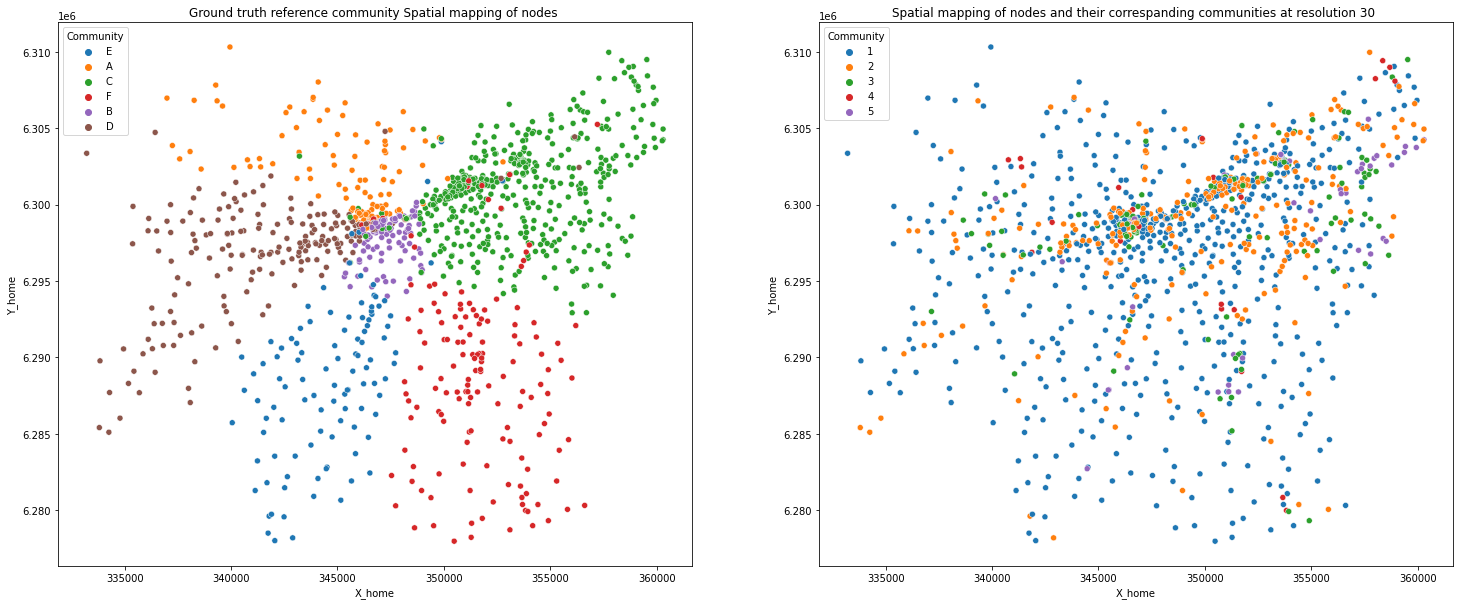

In [131]:
fig, axs = plt.subplots(ncols=2, figsize=(25,10))
axs[1].set_title(
    'Spatial mapping of nodes and their correspanding communities at resolution {} '.format(resolution)
            )
axs[0].set_title('Ground truth reference community Spatial mapping of nodes ')
sns.scatterplot(data=merged_data, x="X_home", y="Y_home",hue="Community",ax=axs[0])
sns.scatterplot(data=res_merged_data, x="X_home", y="Y_home",hue="Community",ax=axs[1])
plt.show()

In [132]:
statistics=pd.DataFrame(columns=['class','mean','standard_deviation'])
for classe in np.unique(merged_data.Community):
    x=torch.from_numpy(
                merged_data[merged_data['Community']==classe][['X_home','Y_home']].values.astype('float64')
                )
    stats=distances_from_centroid_class(x)
    statistics=statistics.append({'class': classe,
                                  'mean':stats[0],'standard_deviation':stats[1]}, ignore_index=True)
for classe in np.unique(res_merged_data.Community):
    x=torch.from_numpy(
                res_merged_data[res_merged_data['Community']==classe][['X_home','Y_home']].values.astype('float64')
                )
    stats=distances_from_centroid_class(x)
    statistics=statistics.append({'class': classe,
                                  'mean':stats[0],'standard_deviation':stats[1]}, ignore_index=True)

<AxesSubplot:xlabel='class', ylabel='mean'>

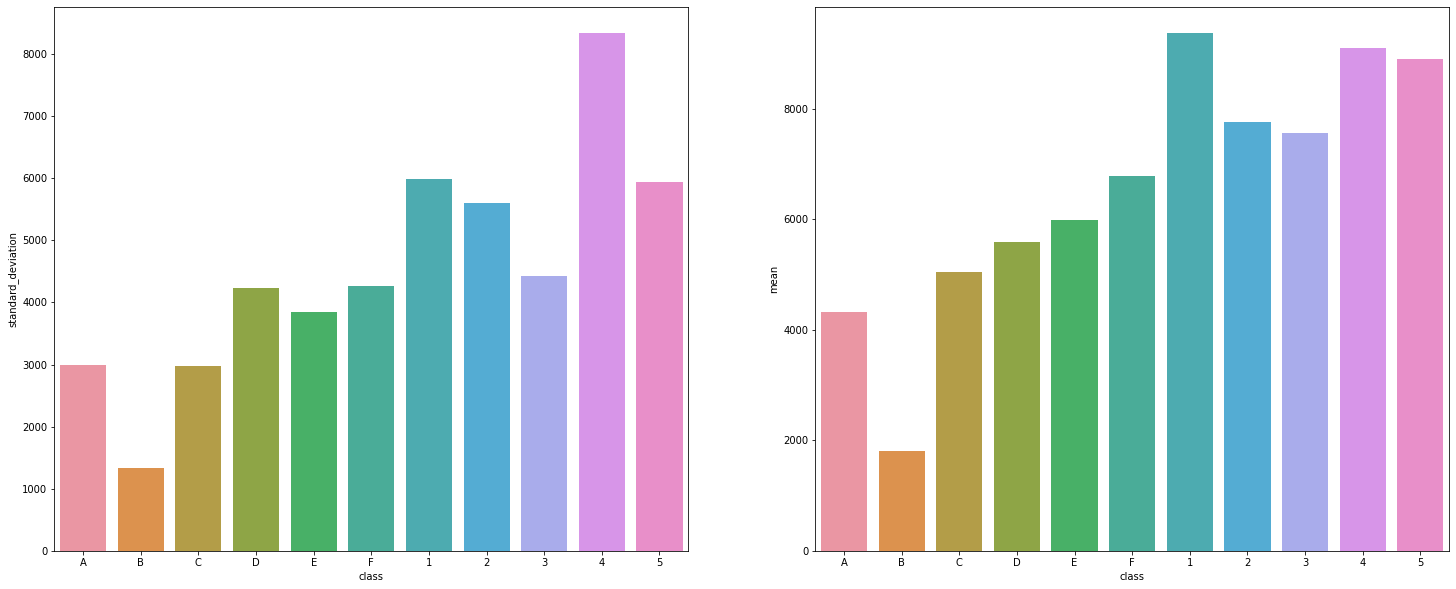

In [133]:
fig, axs = plt.subplots(ncols=2, figsize=(25,10))
sns.barplot(x = 'class', y = 'standard_deviation', data = statistics,ax=axs[0])
sns.barplot(x = 'class', y = 'mean', data = statistics,ax=axs[1])

In [134]:
statistics

class  mean standard_deviation
0      A  4321               2999
1      B  1806               1336
2      C  5040               2978
3      D  5591               4230
4      E  5990               3854
5      F  6774               4269
6      1  9368               5995
7      2  7762               5601
8      3  7563               4420
9      4  9103               8339
10     5  8900               5939

In [135]:
gt_community_metric=round(sum(statistics.standard_deviation[:6])/6,2 )
res_community_metric=round(sum(statistics.standard_deviation[6:])/(len(statistics)-6),2)
print(gt_community_metric,res_community_metric)

3277.67 6058.8


# Task 3 : Community Dependencies <a class="anchor" id="task3"></a>

# Section 3.1 :Used Metrics <a class="anchor" id="met"></a>

In [161]:
def closeness_centrality(G, node ):
    return nx.closeness_centrality(G,node)

In [145]:
## res_lerged_data used comes from resolution 15
res_merged_data

X_home       Y_home    Tower Community
0     341686.4129   6281809.47   SBNC1A         1
1     345654.7848  6299613.133  NTSUF8A         1
2     350460.2429  6301504.902   SRCC1A         2
3     356795.8867  6302740.317  HARRIAA         1
4     353566.2768  6290889.943  DPCRZAA         1
...           ...          ...      ...       ...
1139  350390.3488  6299195.271  IJSUDAA         2
1140  351787.7215  6301243.181  MEFSF9A         3
1141  356146.1541  6304427.727  EALCONA         2
1142  345723.8749  6299767.667  COSNORA         2
1143   350183.069  6300496.197  BBPVIU1         2

[1144 rows x 4 columns]

# Section 3.2 :Stats and summary <a class="anchor" id="sum"></a>

In [146]:
closeness=[]
for node in res_merged_data.Tower:
    closeness.append(closeness_centrality(undirected_graph, node ))

In [162]:
betweenness=nx.betweenness_centrality(undirected_graph)

In [165]:
betweenness_values=[]
for tower in res_merged_data.Tower:
    betweenness_values.append(betweenness[tower])

In [147]:
res_merged_data['closeness_centrality']=closeness
res_merged_data['betweenness_values']=betweenness_values

In [168]:
res_merged_data['GT_community']=merged_data['Community']

In [169]:
res_merged_data

X_home       Y_home    Tower Community  closeness_centrality  \
0     341686.4129   6281809.47   SBNC1A         1              0.558378   
1     345654.7848  6299613.133  NTSUF8A         1              0.637124   
2     350460.2429  6301504.902   SRCC1A         2              0.630447   
3     356795.8867  6302740.317  HARRIAA         1              0.583461   
4     353566.2768  6290889.943  DPCRZAA         1              0.614516   
...           ...          ...      ...       ...                   ...   
1139  350390.3488  6299195.271  IJSUDAA         2              0.414431   
1140  351787.7215  6301243.181  MEFSF9A         3              0.404316   
1141  356146.1541  6304427.727  EALCONA         2              0.405463   
1142  345723.8749  6299767.667  COSNORA         2              0.389836   
1143   350183.069  6300496.197  BBPVIU1         2              0.386802   

      betweenness_values GT_community  
0           4.488876e-04            E  
1           2.398722e-03            A  
2           4.008903e-03            C  
3           1.743201e-03            C  
4           2.002560e-03            F  
...                  ...          ...  
1139        2.671251e-08            C  
1140        4.570762e-08            F  
1141        0.000000e+00            D  
1142        0.000000e+00            A  
1143        0.000000e+00            C  

[1144 rows x 7 columns]

<AxesSubplot:xlabel='betweenness_values', ylabel='Count'>

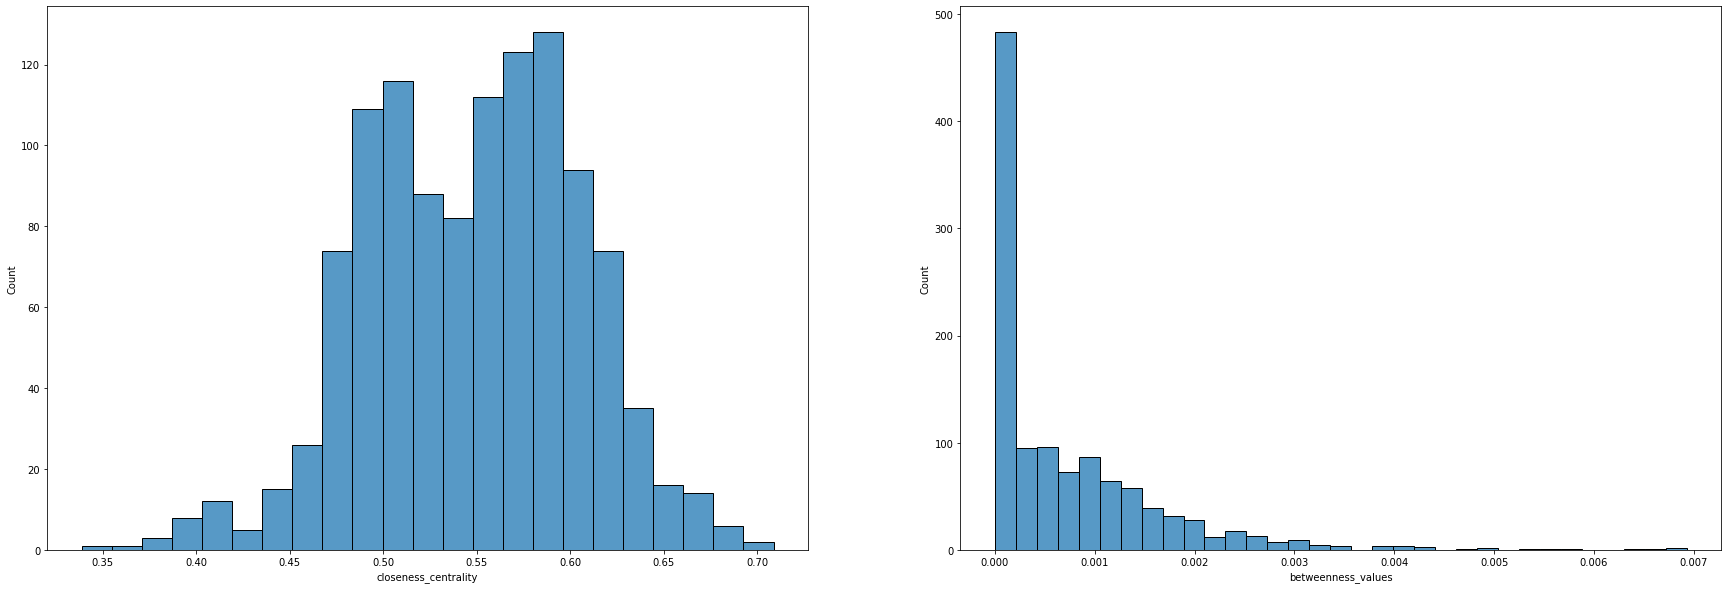

In [176]:
fig, axs = plt.subplots(ncols=2, figsize=(30,10))
sns.histplot(data=res_merged_data,x='closeness_centrality',ax=axs[0])
sns.histplot(data=res_merged_data,x='betweenness_values',ax=axs[1])